# K Nearest Neighbours (KNN) – Home Exercise

This is a home excerise for AI-hub internship candidates. Please submit a Jupyter notebook link. Please do not use any AI (e.g. chatGPT) to solve this.

## A few useful links:
•	Some short data science courses, including intro to Python and Machine learning, can be found on [Kaggle](https://www.kaggle.com/learn)

•	Link to HPC [wiki](https://hpcwiki.weizmann.ac.il/en/home/ai_hub)

•	Link to our WEXAC [Jupyter hub](https://access.wexac.weizmann.ac.il:8000/hub/login) (you'll need a WEXAC user)


## Intoduction
Short intro to machine learning can be found [here](https://www.youtube.com/watch?v=ukzFI9rgwfU)

K Nearest Neighbours: 
KNN is a simple supervised machine learning (ML) algorithm that can be used for classification or regression tasks, and is also frequently used in missing value imputation. It is based on the idea that the closer an observation is to a set of other observations - it is most likely of a "similar" nature. We can therefore classify unforeseen points based on the values of the closest existing points. By choosing K, the user can select the number of nearby observations to use in the algorithm. 
For classification, a majority vote is often used to determine under which class a new observation should fall into: find the K nearest neighbours, and check out of
these K neighbours which label is the most common - and classify the new observation with this label.
In this exercise you will implement a K-nearest neighbours algorithm on the famous built-in Iris dataset in Python. We will do this in few small steps. 

Please write all your answer as functions and not scripts.

## Tutorial

#### 1. Read the built-in dataset and split it to train and test subsets:

a. Write your imports in the first box (add here all the tutorial imports)

b. Write a function that will open the dataset and split it to training and testing with the default parameters: random_state=42  (42="the meaning of life, the universe, and everything"...) and test_size=20 (20 samples), and run it (there are other intersting parameters like stratify, please do not change the defults). Print the shape of the four output matrices.

c. What are the features and targets in the dataset? 

d. Load as dataFrame and print the statistical desription of the data.

Hints:

A. Use the sklearn function which provides an object that has properties `data` and `target` returning the data and the labels respectively, and `feature_names` and `target_names` returning their descriptions (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) for more details)

B. To split the the data between training and testing, use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) - and check its parameters.

In [1]:
# Imports
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Question 1b 
def load_and_split():
    iris=datasets.load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=20, random_state=42)
    print("X_train:", X_train.shape)
    print("X_test:", X_test.shape)
    print("y_train:", y_train.shape)
    print("y_test:", y_test.shape)
    return  X_train, X_test, y_train, y_test

X_train, X_test, Y_train, Y_test = load_and_split()

X_train: (130, 4)
X_test: (20, 4)
y_train: (130,)
y_test: (20,)


In [3]:
# Question 1c
The features are the Xs - which represents the features of the flower, the targets are the Ys which represents the kind of the flower.

In [123]:
# Question 1d
def load_and_split_df():
    iris=datasets.load_iris()
    iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
    iris_df['species'] = iris.target
    return  iris_df.describe()

load_and_split_df()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### 2. Distance function: 

Write a function `calc_distance` that calculates the distance between a given point and an array of points. Different distance measures might be used, pick one that is simple. Test it on this input. A simple test that is easy to check by a calculator (or by hand) is alway recommended in your code. 

`calc_distance(X_train[0,:], X_train[:4,:])`

Hint: find a function that does it (e.g. in sklearn) or write it yourself. Check that the point shape is correct.

In [124]:
# Question 2 
def calc_distance(x,y):
    dist = pairwise_distances([x], y, metric='euclidean').flatten()
    return dist
dist=calc_distance(X_train[0,:], X_train[:4,:])
dist

array([0.        , 3.9306488 , 0.41231056, 4.76025209])

#### 3. K Nearest neighbours: 

Write a function that accepts an input value x0 and searches the training dataset for the k nearest neighbours to x0 using the function you've written, then predicts the input's label according to a majority vote. Test your function for the first row of *the test set* with k=7:

knn(k,X_test[0,:] )

Hint: 
You can calculate all the distances and then sort the distances in ascending order. Then, choose the k first elements. With these k nearest neighbours, do the "voting", i.e. find the most common label amongst them. 


In [125]:
# Question 3
def sort_and_predict(x0,X_train,Y_train,k):
    dist=calc_distance(x0, X_train)
    dist = np.array(dist)  
    sorted_indices = np.argsort(dist)[:k]
    y=Y_train[sorted_indices]
    values, counts = np.unique(y, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_label = values[most_common_index]
    return most_common_label

tag = sort_and_predict(X_train[0, :], X_train,Y_train, 7)

print(tag)

0


#### 4. Accuracy:

a. Calculate the accuracy (as a percentage) of the above prediction using the test dataset. Run it for k=7.

Hint: 
Calculate the prediction given to every element of the test data and compare it to the expected labels from the test. Calculate the fraction of correctly predicted items to the overall number of items.

b. Think about the time for training and for testing. Is this method efficient for large dataset with many samples and features? Why?


##### Answer 4: 


In [140]:
# Quesion 4 
def prediction_accuracy(X_test,Y_test,k,X_train,Y_train):
    X_test=np.array(X_test)
    tag=[]
    for row in X_test:
        tag.append(sort_and_predict(row,X_train,Y_train,k))
    accuracy=np.sum(tag == Y_test) / len(Y_test)
    return accuracy

k=7 
accuracy=prediction_accuracy(X_test,Y_test,k,X_train,Y_train)
print(accuracy)

0.95


#### 5. Dependence on k:

Write a function that calculates the accuracy as a function of k and plots accuracy vs. k.

Hint: use `plot` function in `matplotlib.pyplot`.


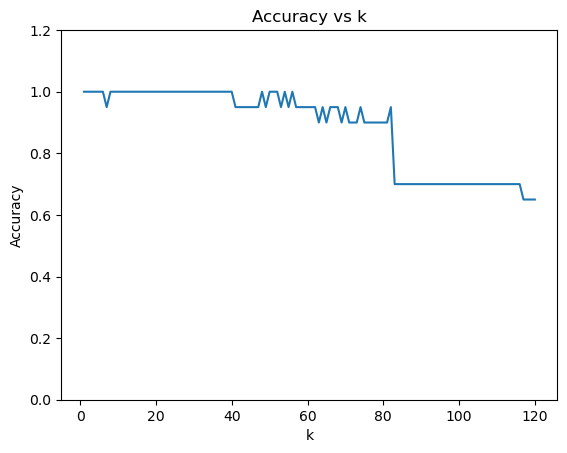

In [155]:
# Question 5 
def accuracy_per_k(X_test,Y_test,X_train,Y_train,Range):
    accuracy=[]
    for k in Range:
        accuracy.append(prediction_accuracy(X_test,Y_test,k,X_train,Y_train))
    return accuracy
        
        
Ks=range(1,121)        
accuracy=accuracy_per_k(X_test,Y_test,X_train,Y_train,Ks)
plt.plot(Ks, accuracy)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.ylim(0, 1.2)
plt.show()

## 6.  Main function: 

a. Write a main function that contains loading the data and calculating the accuracy as a function of k (k=1,2,..15). 

b. Run it 20 times to check for variations (with random_state=None) with one plot of mean and STD as an output. 

c. What do you learn from it? Which values of k are better?

Hint: Can you see a differnce between odd and even values of k?

In [180]:
# Question 6a
def main(RandState,largest_k):
    iris=datasets.load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=20, random_state=RandState)
    Ks=range(1,largest_k+1)
    accuracy=accuracy_per_k(X_test,Y_test,X_train,Y_train,Ks)
    return accuracy


[0.35   0.3575 0.325  0.3275 0.32   0.295  0.3025 0.3025 0.305  0.315
 0.2975 0.2875 0.29   0.3275 0.3025]


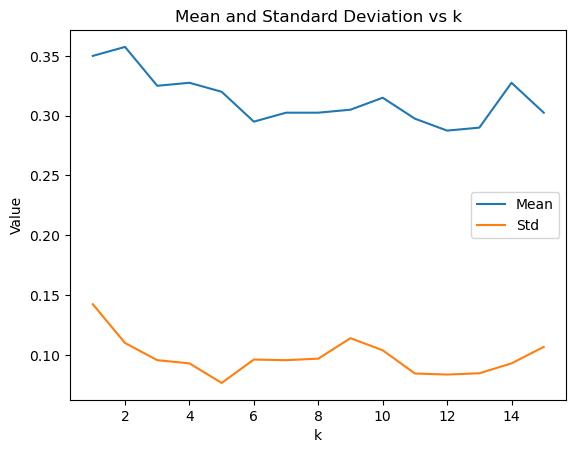

In [181]:
# Question 6b
accuracy = np.empty((0, 15))
for n in range(1,21):
    new_row=main(None,15)
    # print(new_row)
    accuracy = np.vstack([accuracy, new_row])

means = np.mean(accuracy, axis=0)
stds = np.std(accuracy, axis=0)

print(means)
plt.plot(range(1,16), means, label='Mean')
plt.plot(range(1,16), stds, label='Std')

plt.xlabel('k')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation vs k')
plt.legend()

##### Answer 6c: 


#### 7. Scikit-learn KNN classifier:

a. Use sklearn’s [KNN classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to write the function calc_accuracy_sklearn that Calculate the accuracy (as a percentage) on the test data. Run it for k=7 and compare the result with question 4. 

b. What are the advantages of using the sklearn module for such a simple classifier?

In [7]:
# Question 7a
def calc_accuracy_sklearn(X_train, Y_train, X_test, Y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    tag = knn.predict(X_test)
    accuracy=np.sum(tag == Y_test) / len(Y_test)
    return accuracy


accuracy=calc_accuracy_sklearn(X_train, Y_train, X_test, Y_test, 7)
print(accuracy)


0.95


##### Answer 7b:


In [ ]:
No use of loops

#### 8. Scatter plot:

a. Plot the dataset as a scatter plot for features 0 and 2 setting the colors of the points in the plot based on their label, and write the feature names on the axis.

b. What can you learn from this plot?

c. Bonus (optional): plot the boundary display for features 0 and 2 using [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html)

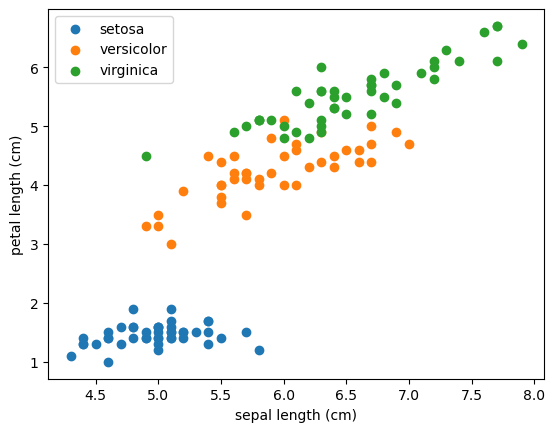

In [28]:
# Question 8a
iris=datasets.load_iris()
feature_names = iris.feature_names
label_names = iris.target_names
x_label=feature_names[0]
y_label=feature_names[2]

data_0_x=X_train[Y_train==0,0]
data_0_y=X_train[Y_train==0,2]
data_1_x=X_train[Y_train==1,0]
data_1_y=X_train[Y_train==1,2]
data_2_x=X_train[Y_train==2,0]
data_2_y=X_train[Y_train==2,2]

plt.scatter(data_0_x,data_0_y,label=label_names[0])
plt.scatter(data_1_x,data_1_y,label=label_names[1])
plt.scatter(data_2_x,data_2_y,label=label_names[2])
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()

##### Answer 8b



In [12]:
# 8c
